In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import os
import sys
import glob

In [3]:
sys.path.append("../..")

from WatChMaL_analysis.WatChMaL.analysis.gan_plot_utils import disp_gan_learn_hist

In [4]:
path = '/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs'
title = 'GAN Training History'

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


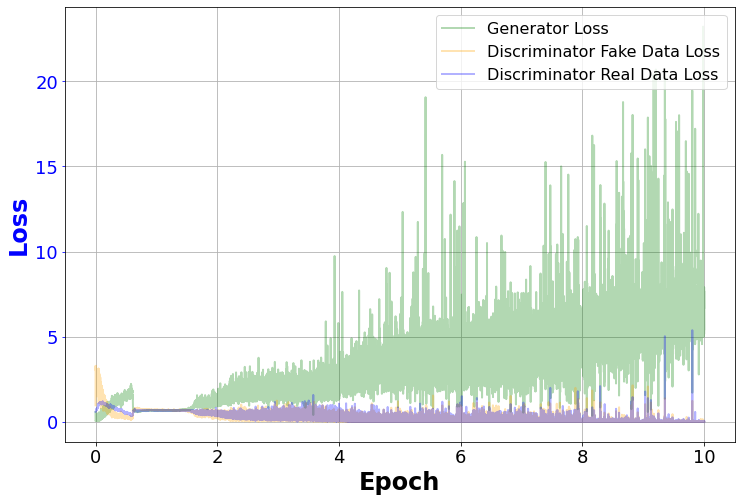

In [5]:
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs')#, losslim=2.5)

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_2/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


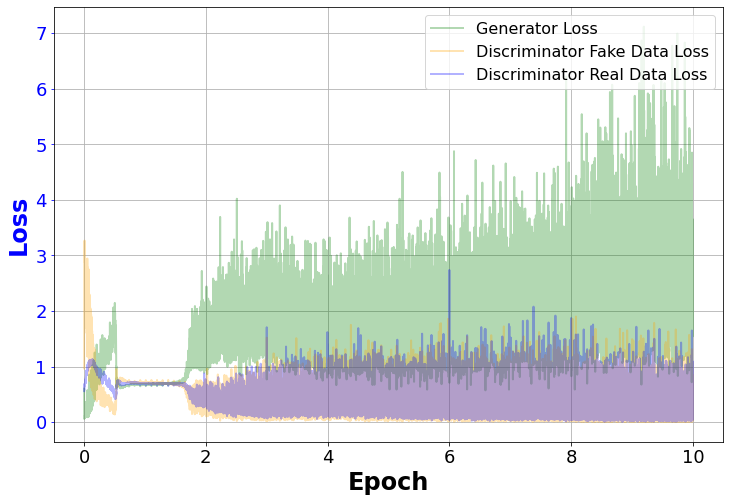

In [6]:
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_2/outputs')#, losslim=2.5)

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_3/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


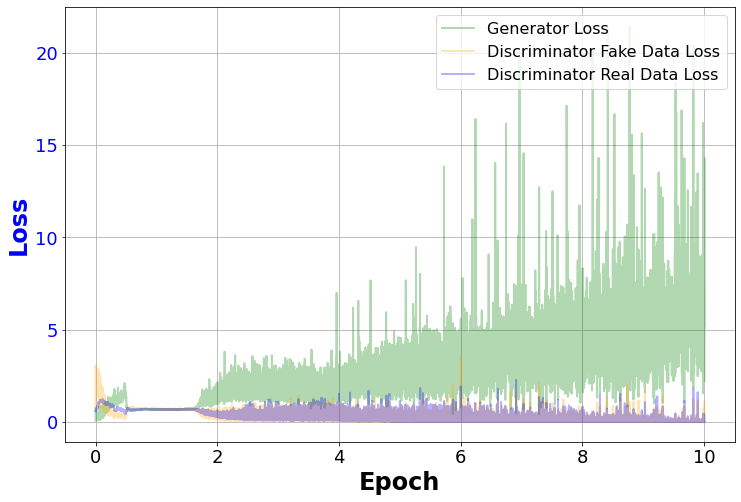

In [7]:
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_3/outputs')#, losslim=2.5)

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_4/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


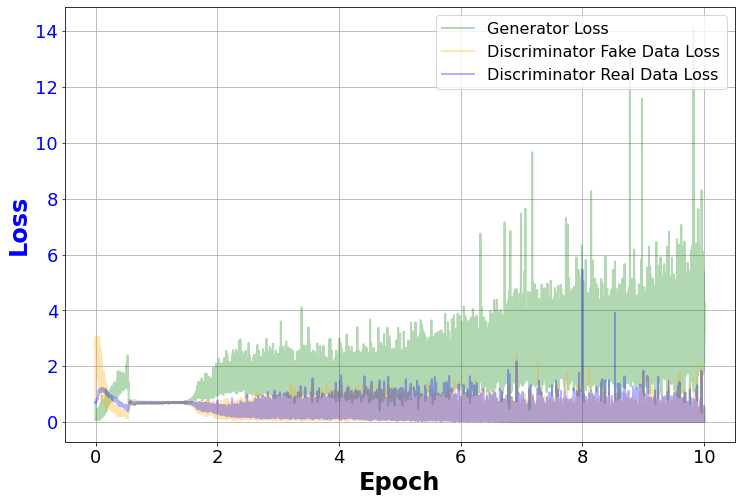

In [8]:
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_4/outputs')#, losslim=2.5)

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


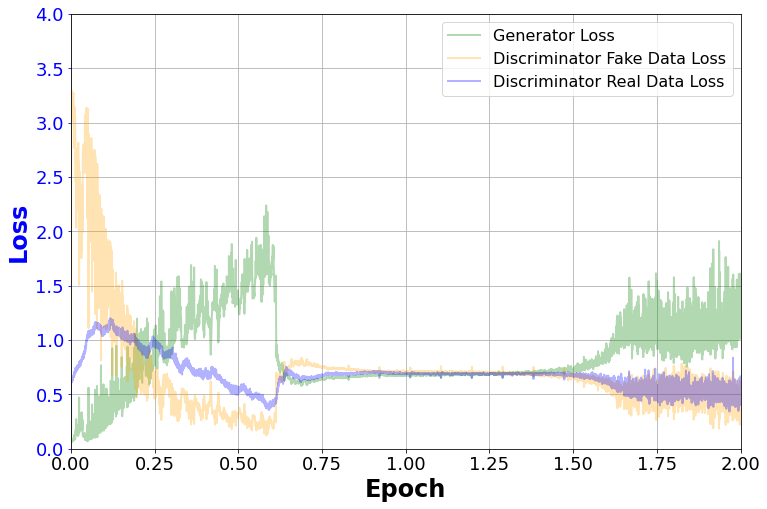

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_2/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


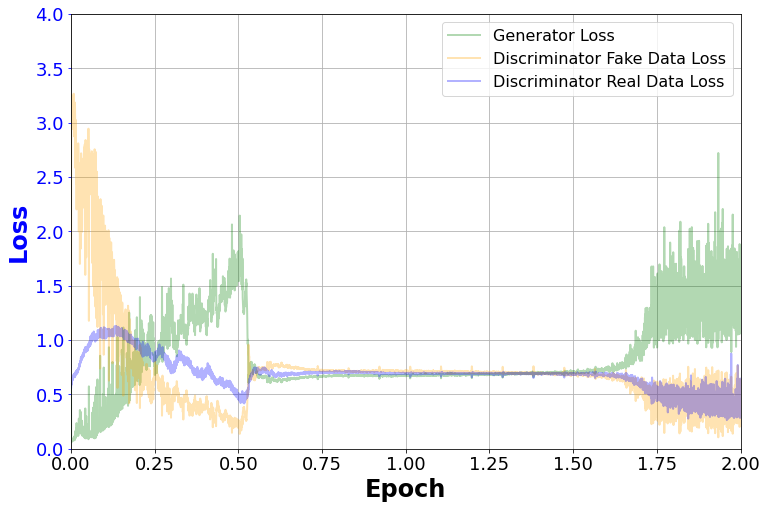

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_3/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


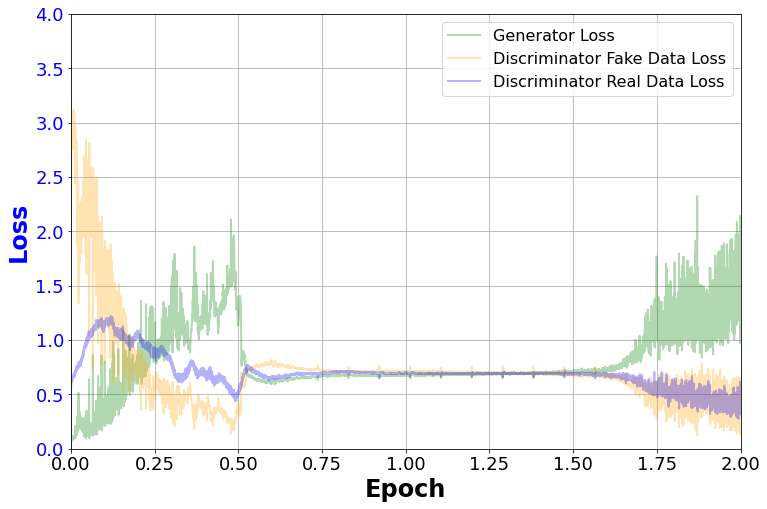

Found training logs:  ['/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_4/outputs/log_train_0.csv']
Index(['iteration', 'epoch', 'g_loss', 'd_loss_fake', 'd_loss_real'], dtype='object')


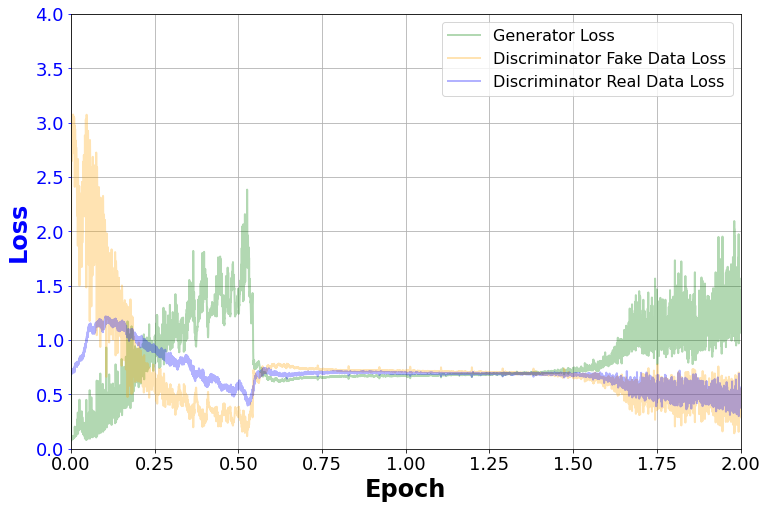

In [9]:
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs', xlim=[0, 2], losslim=4)
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_2/outputs', xlim=[0, 2], losslim=4)
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_3/outputs', xlim=[0, 2], losslim=4)
fig = disp_gan_learn_hist('/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_4/outputs', xlim=[0, 2], losslim=4)

In [10]:
path = '/home/jtindall/WatChMaL/outputs/2021-01-09/gan_full_1/outputs'

In [11]:
image_batches = [np.load(fname,allow_pickle=True)['gen_imgs'] for fname in glob.glob(os.path.join(path,'imgs/*'))]
print(len(image_batches))

108


In [12]:
# Plotting imports
import sys
sys.path.append("../..")

from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import PMT_to_flat_cylinder_mapping, PMT_to_flat_cylinder_map_positive
from WatChMaL_analysis.WatChMaL.analysis.event_plot_utils import get_event_data_from_index, EventDisplay, pmts_per_mpmt




In [13]:
geo_path = '/fast_scratch/WatChMaL/data/mPMT_full_geo.npz'
geofile = np.load(geo_path, allow_pickle=True)

tubes = geofile[ 'tube_no' ]
tube_xyz = geofile[ 'position' ]

In [14]:
PMTFlatMapping = PMT_to_flat_cylinder_mapping( tubes, tube_xyz )
PMTFlatMapPositive = PMT_to_flat_cylinder_map_positive( tubes, tube_xyz )

In [15]:
mpmt_positions_file = '/data/WatChMaL/data/IWCD_mPMT_image_positions.npz'
mpmt_positions   = np.load(mpmt_positions_file)['mpmt_image_positions']

data_size = np.max(mpmt_positions, axis=0) + 1
n_channels = pmts_per_mpmt
data_size = np.insert(data_size, 0, n_channels)

In [16]:
# Get full set of event PMTs (Since generated events have a value for every PMT)

In [17]:
gen_image_data = image_batches[0][0]

In [18]:
print(gen_image_data.shape)

(19, 40, 40)


In [19]:
print(tubes.flatten().shape)

(15808,)


ValueError: setting an array element with a sequence.

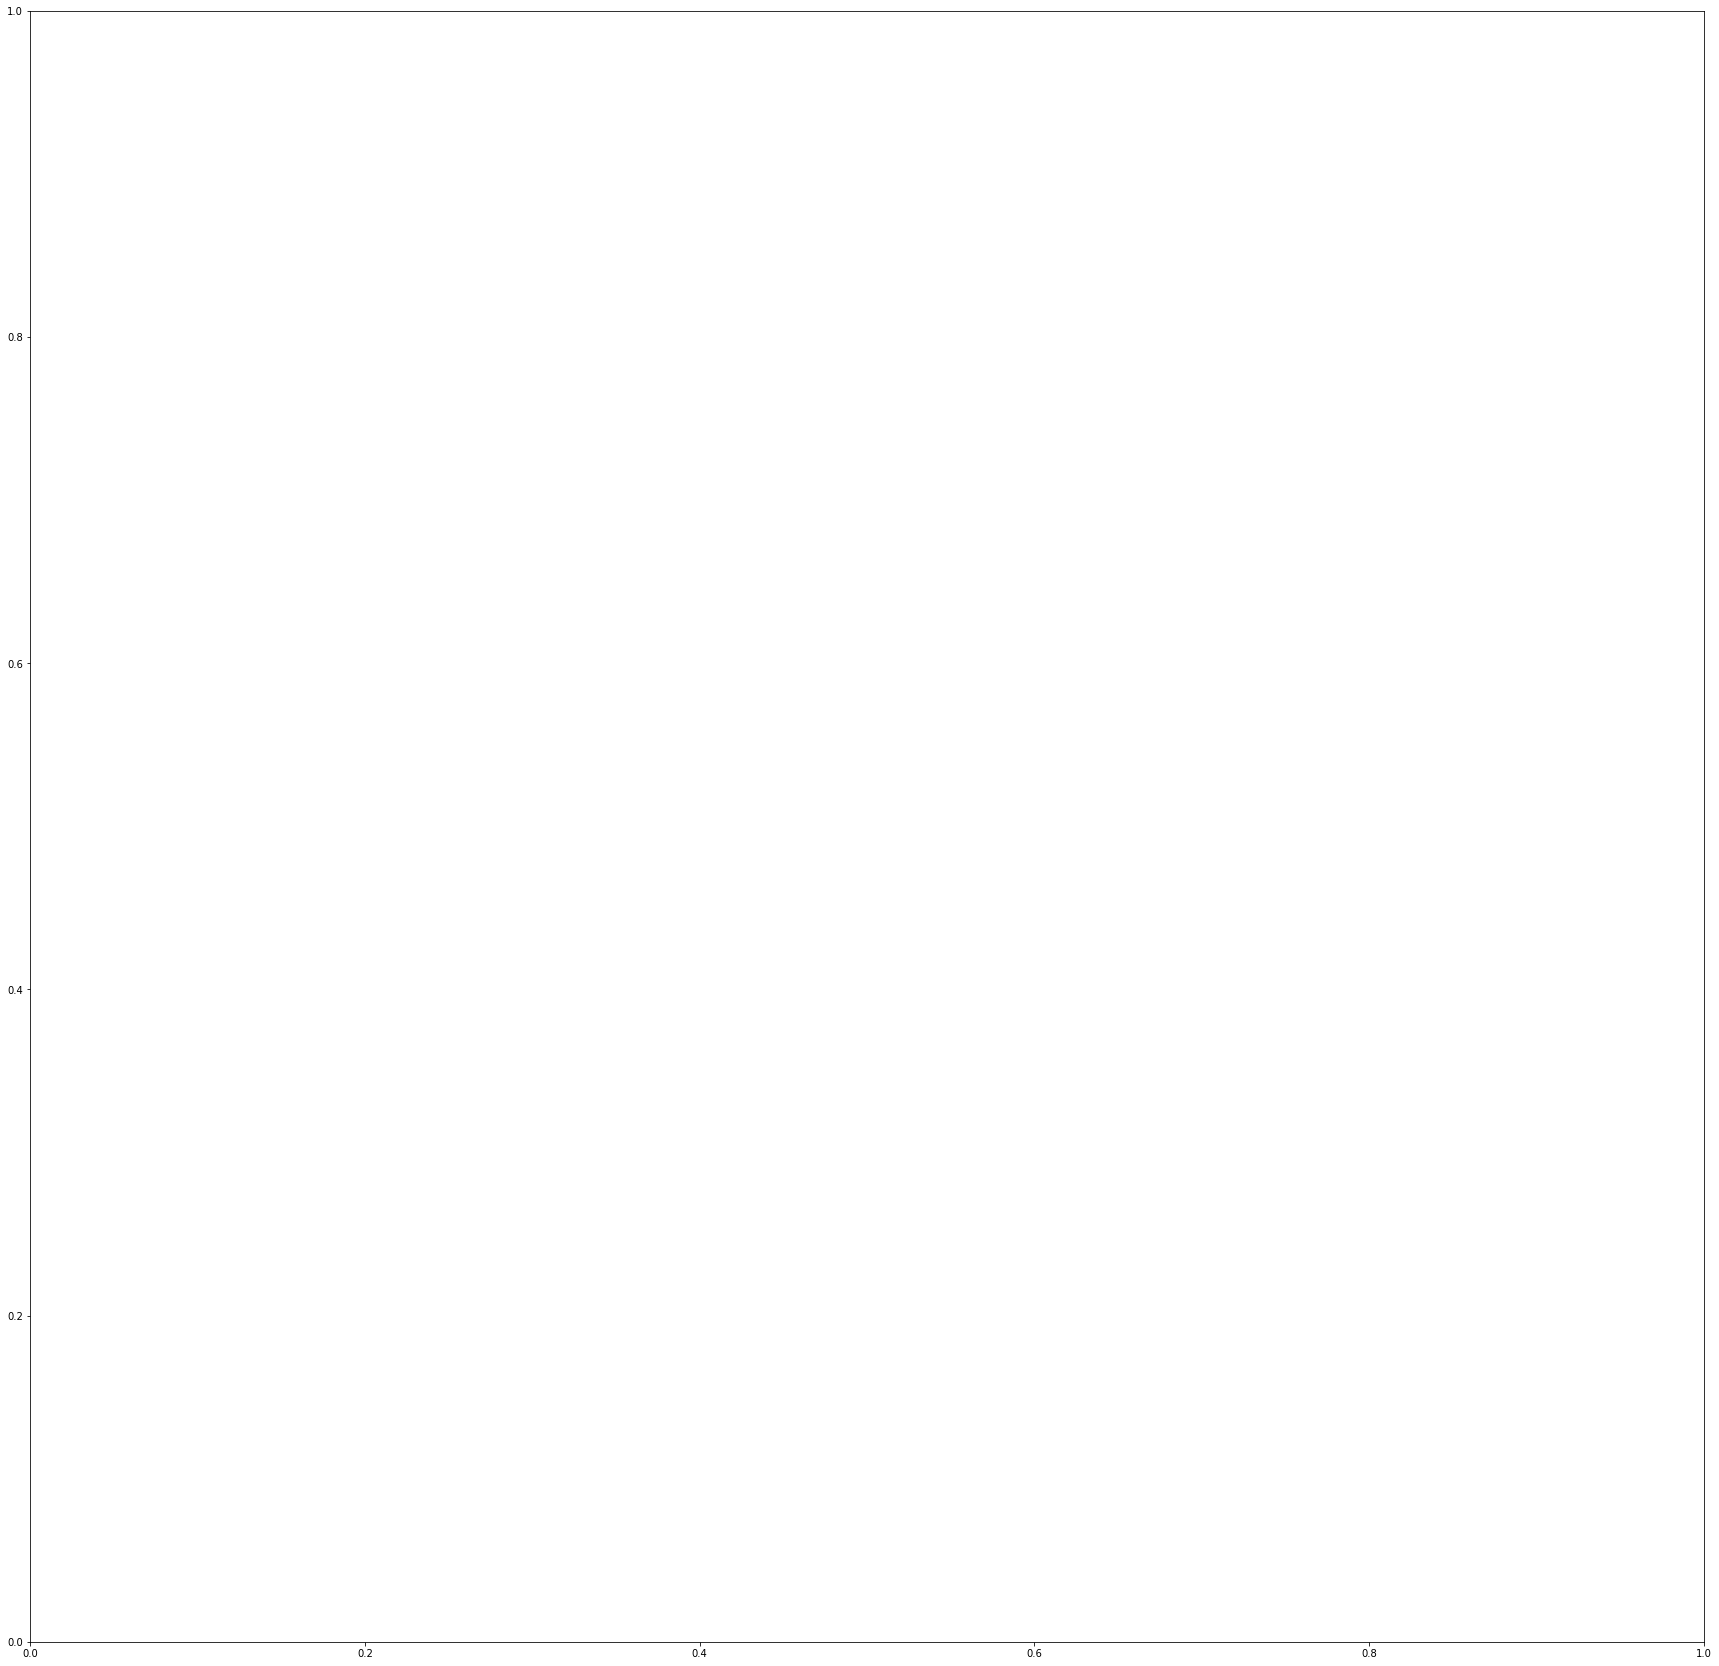

In [20]:
EventDisplay(tubes, gen_image_data, PMTFlatMapPositive)

In [22]:
batch_grids=[]
for image_batch in image_batches:
    batch_grid = np.concatenate([np.pad(np.squeeze(img),2,mode='constant',constant_values=(np.nan,)) for img in image_batch[0:8]],axis=1)
    
    for row_index in range(1,8,1):
        image_row = np.concatenate([np.pad(np.squeeze(img),2,mode='constant',constant_values=(np.nan,)) for img in image_batch[row_index*8:(row_index+1)*8]],axis=1)
        batch_grid = np.concatenate((batch_grid,image_row),axis=0)
    
    batch_grids.append(batch_grid)

In [ ]:
# Display animation of generated images
fig = plt.figure(figsize=(25,25))
plt.axis("off")
ims = [[plt.imshow(img, animated=True,cmap=plt.cm.viridis)] for img in batch_grids]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
HTML(ani.to_jshtml())

TypeError: Invalid shape (184, 352, 44) for image data

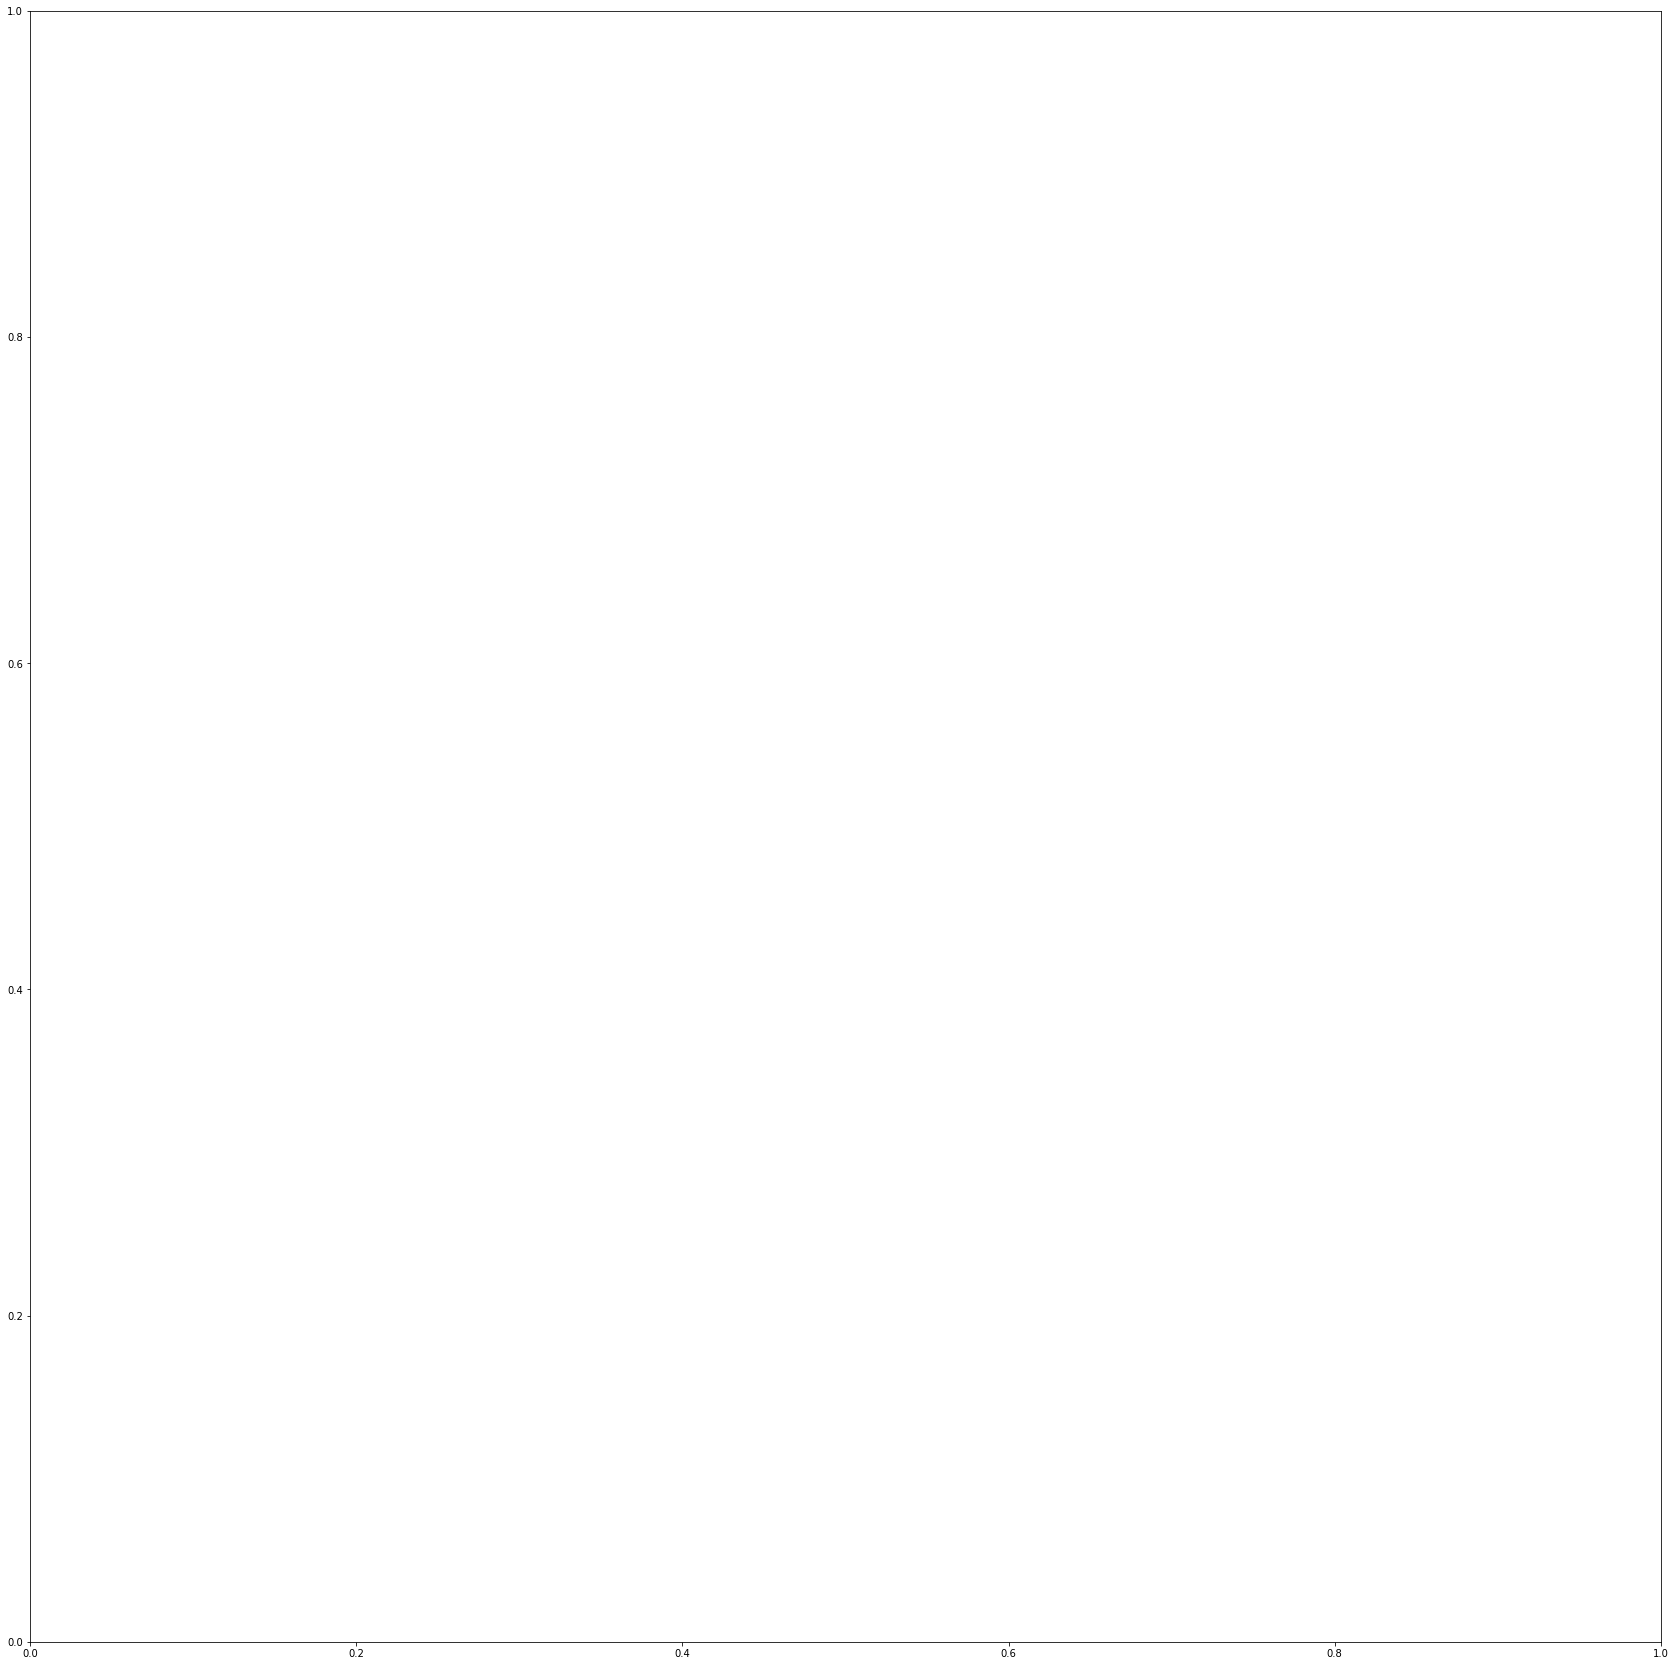

In [23]:
# Display most recent generated image
fig = plt.figure(figsize = (30,30)) 
ax = fig.add_subplot(111)
ax.imshow(batch_grids[-3], cmap=plt.cm.viridis, interpolation='none')
ax.set_title('Most Recent Generated Images')
plt.show()